# ML_Ng Homework 1

*Don't forget to include matplotlib inline up top *

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = np.loadtxt("../ex1data2.txt", delimiter=',')
X = data[:, :-1]
y = data[:, -1:]
m = y.size

# % Print out first 10 examples for kicks
print(f'x = {X[:10, :]}, \n y = {y[:10]}')

x = [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]], 
 y = [[399900.]
 [329900.]
 [369000.]
 [232000.]
 [539900.]
 [299900.]
 [314900.]
 [198999.]
 [212000.]
 [242500.]]


In [6]:
def feature_normalize(X):
    X_norm = X
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = np.divide(np.subtract(X, mu), sigma)

    return X_norm, mu, sigma

In [7]:
# % Scale features and set them to zero mean
X, mu, sigma = feature_normalize(X)

# % Add intercept term to X
X = np.append(X, np.ones((m, 1)), axis=1)

## Part 2: Gradient Descent

### Compute Cost Plot Helper

In [8]:
def compute_cost_multi(X, y, theta):
    m = y.size
    J = 0
    h = X.dot(theta)
    J = 1 / (2 * m) * (h - y).T.dot(h - y)
    return J


### Gradient Descent Helper Fn

In [9]:
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros((num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        thetaNew = theta - (alpha * 1 / m * ((h - y).T.dot(X)).T)
        theta = thetaNew

        # Save the cost J in every iteration
        J_history[i] = compute_cost_multi(X, y, theta)
    return theta, J_history


In [10]:
print('Running gradient descent ...\n')

# % Choose some alpha value
alpha = 0.01
num_iters = 400

# % Init Theta and Run Gradient Descent
theta = np.zeros((X.shape[1], 1))

theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)

# % Display gradient descent's result
print('Theta computed from gradient descent: \n')
print(f' {theta} \n')
print('\n')

Running gradient descent ...

Theta computed from gradient descent: 

 [[ 99411.44947359]
 [  3267.01285407]
 [334302.06399328]] 





### Plot the Computed Cost of J over time

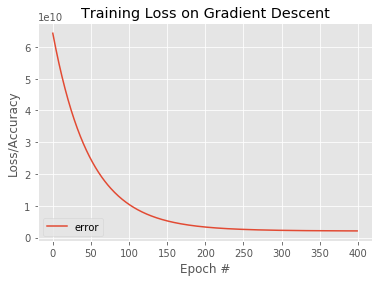

In [11]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_iters), J_history, label="error")
plt.title("Training Loss on Gradient Descent")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

### Test data for prediction

In [12]:
# % Estimate the price of a 1650 sq - ft, 3 br house
sample_house_X = np.array([1650, 3])
s = (sample_house_X - mu) / sigma
s = np.append(s, np.ones((1, 1)))
price = s.dot(theta)[0]

print(
    f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${price}\n')

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $289221.5473712181



## Part 3: Normal Equations

In [13]:
def normal_equation(X, y):
    theta = np.zeros((X.shape[1], 1))
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [14]:
print('Solving with normal equations...\n')

data = np.loadtxt("../ex1data2.txt", delimiter=',')
X = data[:, :-1]
y = data[:, -1:]
m = y.size

# % Add intercept term to X
X = np.append(X, np.ones((m, 1)), axis=1)

theta = normal_equation(X, y)

# % Display normal equation's result
print('Theta computed from the normal equations: \n')
print(f' {theta} \n')
print('\n')

# % Estimate the price of a 1650 sq - ft, 3 br house
s = np.array([1650, 3, 1])
price = s.dot(theta)[0]

print(
    f'Predicted price of a 1650 sq-ft, 3 br house (using normal equation):\n ${price}\n')

Solving with normal equations...

Theta computed from the normal equations: 

 [[  139.21067402]
 [-8738.01911233]
 [89597.9095428 ]] 



Predicted price of a 1650 sq-ft, 3 br house (using normal equation):
 $293081.4643348983

